<a href="https://www.kaggle.com/code/andir16/rsna-2022-cervical-spine-fracture-detection-eda?scriptVersionId=118334557" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>1.1 Context</b></p>
</div>

This coding challenge is organized by the [Radiological Society of North America (RSNA)](https://www.rsna.org/) together with the [American Society of Neuroradiology (ASNR)]( https://www.asnr.org/) and the [American Society of Spine Radiology (ASSR)](https://www.theassr.org/) to explore whether AI can be used to help detect and localize cervical spine fractures.

“To create the ground truth dataset, the challenge planning task force collected imaging data sourced from twelve sites on six continents, including approximately 3,000 CT studies. Spine radiology specialists from the ASNR and ASSR provided expert image level annotations these studies to indicate the presence, vertebral level and location of any cervical spine fractures.” [(Competition description)]( https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/overview/description)

The goal is to match the radiologist’s performance in the detection and localization of fractures to the seven vertebrae that comprise the cervical spine (C1-C7 – see 1.2 Task).

**Why?**
“Over 1.5 million spine fractures occur annually in the United States alone resulting in over 17,730 spinal cord injuries annually. The most common site of spine fracture is the cervical spine. There has been a rise in the incidence of spinal fractures in the elderly and in this population, fractures can be more difficult to detect on imaging due to superimposed degenerative disease and osteoporosis. Imaging diagnosis of adult spine fractures is now almost exclusively performed with computed tomography (CT) instead of radiographs (x-rays). Quickly detecting and determining the location of any vertebral fractures is essential to prevent neurologic deterioration and paralysis after trauma.” [(Competition description)]( https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/overview/description)




<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>1.2 Task</b></p>
</div>

The task is, based on the input of CT images, to determine whether there are any fractures in one of the seven vertebrae that comprise of the cervical spine (C1-C7). Fractures in the skull base, thoracic spine, ribs, and clavicles are ignored. 

The model must determine whether there are any fractures and in which vertebrae they occur. Per patient there are 8 expected outputs: One for each of the seven cervical vertebrae and one “any” which indicates whether the patient has a fracture of any kind or not. 

<center>
<img src="https://cdn.britannica.com/57/54757-050-99173B1B/Human-vertebral-column.jpg" style="max-width:800px">
<div style>Anatomy - Vertebral Column <a href="https://www.britannica.com/science/vertebral-column">(britannica.com)</a></div>
</center>

<hr>

*Competition timeline:*
    
* Start date - 28th July 2022
* Entry Deadline - 20th October 2022
* Finals Submission Deadline - 27th October 2022

*All deadlines are at 11:59 PM UTC on the corresponding day unless otherwise noted.*

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>1.3 Evaluation metric</b></p>
</div>

"Submissions are evaluated using a **weighted multi-label logarithmic loss**. Each fracture sub-type is its own row for every exam, and you are expected to predict a probability for a fracture at each of the seven cervical vertebrae designated as C1, C2, C3, C4, C5, C6 and C7. There is also an any label, patient_overall, which indicates that a fracture of ANY kind described before exists in the examination. Fractures in the skull base, thoracic spine, ribs, and clavicles are ignored. The **any label is weighted more highly than specific fracture level sub-types**.

For each exam Id, you must submit a set of predicted probabilities (a separate row for each cervical level subtype). We then take the log loss for each predicted probability versus its true label."[(Competition Evaluation)](https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/overview/evaluation)

The binary weighted log loss function for label j on exam i is specified as:

$
\Large L_{ij} = - w_j \left(y_{ij} \log(p_{ij}) + (1-y_{ij}) \log(1-p_{ij})  \right)
$

The loss is averaged across al rows. 


**Weights ([from Competition Host](https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/discussion/340392)):**
* Vertebrae negative: 1
* Vertebrae positive: 2
* Patient negative: 7
* Patient positive: 14

<hr>

The final output should have 8 rows per image. There will be 2 columns (row_id and fractured). 
<br>

The row id is buit as follows:
<br>
**[image Id]_[Sub-type Name]**
<br>
Example: 1.2.826.0.1.3680043.10197_C1


For each image ID in the test set, the probability for each of the different possible sub-types and the patient overall must be predicted. 

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>1.4 Code requirements</b></p>
</div>

Submissions must be made through **Notebooks**. In order for the "Submit" button to be active after a commit, the following conditions must be met:

* CPU Notebook <= 9 hours run-time
* GPU Notebook <= 9 hours run-time
* Internet access **disabled**
* Freely & publicly available external data is **allowed**, including pre-trained models
* Submission file must be named **submission.csv**

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>1.5 Libraries</b></p>
</div>

To use the dependencies gdcm and pylibjgpeg that are needed to ensure that all images can be displayed correctly, the [Pydicom Utility](https://www.kaggle.com/datasets/ipythonx/for-pydicom) dataset by [M.Innat](https://www.kaggle.com/ipythonx/datasets) can be used. This ensures that the files can also be used correctly offline. 

In [1]:
# From https://www.kaggle.com/code/samuelcortinhas/rsna-fracture-detection-in-depth-eda
'''Offline (need to add dataset --> for-pydicom)'''
!pip install -qU ../input/for-pydicom/python_gdcm-3.0.14-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl ../input/for-pydicom/pylibjpeg-1.4.0-py3-none-any.whl --find-links frozen_packages --no-index

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pydicom
import nibabel as nib
import os

from pprint import pprint
from pydicom.pixel_data_handlers.util import apply_voi_lut
from tqdm import tqdm
from glob import glob

# 2. Data
<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>2.1 Data frames</b></p>
</div>

The data provided consists of 4 different CSV files ans 3 folders that contain images and segmentations.

In [3]:
# Files
!ls ../input/rsna-2022-cervical-spine-fracture-detection

sample_submission.csv  test.csv     train.csv		      train_images
segmentations	       test_images  train_bounding_boxes.csv


<hr>

In [4]:
# Set example path
example_path = "../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.10443/1.dcm"

# Load metadata
train_data = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")
train_bbox = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train_bounding_boxes.csv")
test_data = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/test.csv")
sample_submission = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/sample_submission.csv")

# Print shapes of data
print('training data shape:', train_data.shape)
print('training bounding boxes shape:', train_bbox.shape)
print('test data shape:', test_data.shape)
print('sample submission shape:', sample_submission.shape)

training data shape: (2019, 9)
training bounding boxes shape: (7217, 6)
test data shape: (3, 3)
sample submission shape: (3, 2)


<hr>

## Training Data

* **StudyInstanceUID** -> Study ID which is unique for each patient scan.
* **patient_overall** -> Patient overview, meaning whether any vertebrae has a fracture.
* **C1-C7** -> Indicating whether a vertebray is fractured or not.

In [5]:
train_data.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0


<hr>

## Bounding Box Data

* **StudyInstanceUID** -> Study ID which is unique for each patient scan.
* **x** -> x coordinate of the bottom left corner of the bounding box*
* **y** -> y coordinate of the bottom left corner of the bounding box*
* **width** -> width of the bounding box
* **height** -> height of the bounding box
* **slice_number** -> slice number of the scan

*The coordinates of the bounding box are for the bottom left corner and not in the center as per usual convention. See the comments here: https://www.kaggle.com/code/samuelcortinhas/rsna-fracture-detection-in-depth-eda/comments

In [6]:
train_bbox.head()

,StudyInstanceUID,x,y,width,height,slice_number
0,1.2.826.0.1.3680043.10051,219.27715,216.71419,17.30440,20.38517,133
1,1.2.826.0.1.3680043.10051,221.56460,216.71419,17.87844,25.24362,134
2,1.2.826.0.1.3680043.10051,216.82151,221.62546,27.00959,26.37454,135
3,1.2.826.0.1.3680043.10051,214.49455,215.48637,27.92726,37.51363,136
4,1.2.826.0.1.3680043.10051,214.00000,215.48637,27.00000,43.51363,137


<hr>

## Test Data

* **row_id** -> The row ID. This will match the same column in the sample submission file.
* **StudyInstanceUID** -> Study ID which is unique for each patient scan.
* **prediction_type** -> Which one of the eight target columns needs a prediction in this row.

In [7]:
test_data.head()

,row_id,StudyInstanceUID,prediction_type
0,1.2.826.0.1.3680043.10197_C1,1.2.826.0.1.3680043.10197,C1
1,1.2.826.0.1.3680043.10454_C1,1.2.826.0.1.3680043.10454,C1
2,1.2.826.0.1.3680043.10690_C1,1.2.826.0.1.3680043.10690,C1


<hr>

## Sample Submission

* **row_id** -> Unique to each patient scan including the concerned vertebrae.
* **fractured** -> Target column with prediction.

In [8]:
sample_submission.head()

,row_id,fractured
0,1.2.826.0.1.3680043.10197_C1,0.5
1,1.2.826.0.1.3680043.10454_C1,0.5
2,1.2.826.0.1.3680043.10690_C1,0.5


# 3. Exploratory Data Analysis (EDA)
<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>3.1 Data Analysis</b></p>
</div>

The overall split of the data is 1058 (52.4% no fracture) and 961 (47.6% with fracture). Of the patients with fractures, there are several patients that have more than one fracture.

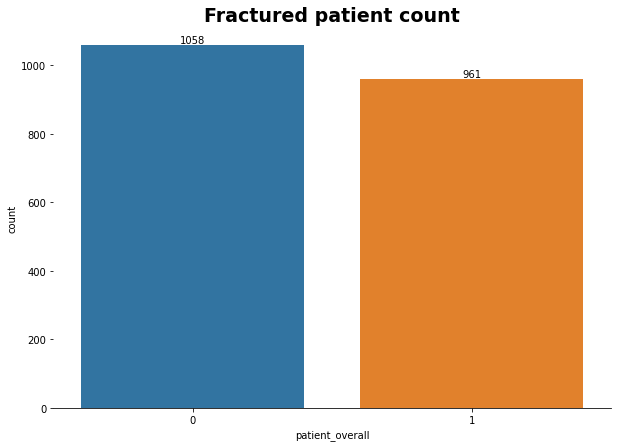

In [9]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=train_data, x="patient_overall")
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Fractured patient count", weight="bold", size=19)
sns.despine(right=True, top=True, left=True);

<hr>

The most fractures appear in the upper and lower vertebrae with **C7 (27.22%)** and **C2 (19.74%)** with the highest portion. **C3 (5.06%)** and **C4 (7.48%)** have the lowest portion.

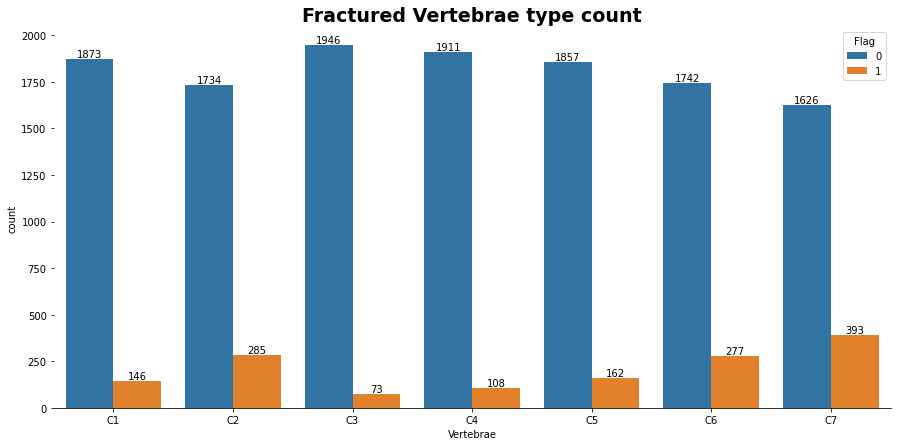

In [10]:
data_count = pd.melt(train_data, 
             id_vars=['StudyInstanceUID', 'patient_overall'],
             var_name="Vertebrae",
             value_name="Flag")

plt.figure(figsize=(15, 7))
ax = sns.countplot(data=data_count, x="Vertebrae", hue="Flag")
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Fractured Vertebrae type count", weight="bold", size=19)
sns.despine(right=True, top=True, left=True);

In [11]:
percentage_table = data_count[["Vertebrae","Flag"]].groupby("Vertebrae").sum()
percentage_table["percentage"] = np.round((percentage_table["Flag"] / percentage_table["Flag"].sum())*100,2)
percentage_table

,Flag,percentage
Vertebrae,,
C1,146,10.11
C2,285,19.74
C3,73,5.06
C4,108,7.48
C5,162,11.22
C6,277,19.18
C7,393,27.22


<hr>

If a patient has **multiple fractures**, then they are more likely to be on a **bordering vertebra**.
For example a fracture in C1 will more likely be next to a fracture in C2 then in C5.

Text(0.5, 1.0, 'Correlations')

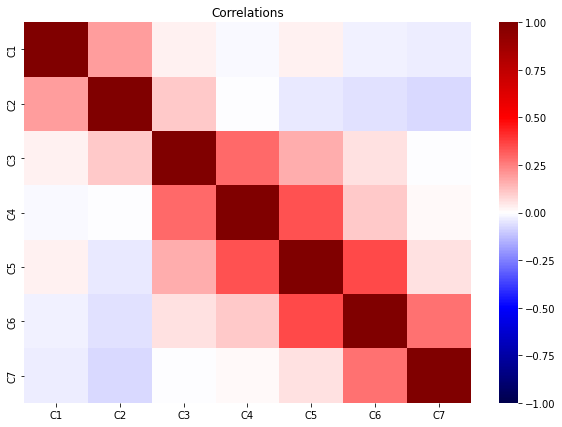

In [12]:
plt.figure(figsize=(10,7))
corr = train_data[['C1','C2','C3','C4','C5','C6','C7']].corr()
sns.heatmap(corr, cmap="seismic", vmin=-1, vmax=1)
plt.title('Correlations')

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>3.2 Patient ID's</b></p>
</div>

Each patient has a **unique ID** which is used to identiy the patient. This is also the ID that has to be used for the output (submission) in combination with the vertebrae and the overall evaluation (see 1.3 Evaluation metric).

In [13]:
for x in range(20):
    print(train_data["StudyInstanceUID"][x])

1.2.826.0.1.3680043.6200
1.2.826.0.1.3680043.27262
1.2.826.0.1.3680043.21561
1.2.826.0.1.3680043.12351
1.2.826.0.1.3680043.1363
1.2.826.0.1.3680043.4859
1.2.826.0.1.3680043.18659
1.2.826.0.1.3680043.17364
1.2.826.0.1.3680043.849
1.2.826.0.1.3680043.24045
1.2.826.0.1.3680043.4744
1.2.826.0.1.3680043.15773
1.2.826.0.1.3680043.24946
1.2.826.0.1.3680043.9290
1.2.826.0.1.3680043.5482
1.2.826.0.1.3680043.11090
1.2.826.0.1.3680043.13810
1.2.826.0.1.3680043.28252
1.2.826.0.1.3680043.26052
1.2.826.0.1.3680043.4131


<hr>
<br>

When looking at the Study ID's, the assumption arises that only the numbers after the last period are unique. The code below by [Samual Cortinhas](https://www.kaggle.com/code/samuelcortinhas/rsna-fracture-detection-in-depth-eda) confirms that assumption.

In [14]:
for i in range(7):
    print(train_data['StudyInstanceUID'].map(lambda x : x.split('.')[i]).unique())

['1']
['2']
['826']
['0']
['1']
['3680043']
['6200' '27262' '21561' ... '14341' '12053' '18786']


# 4. Images
<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>4.1 Digital Imaging and Communications in Medicine (DICOM)</b></p>
</div>

"DICOM, from an informatics and community standpoint, is one of the most successful efforts for a standard that we can think of. DICOM stands for Digital Imaging and Communications in Medicine, and since its creation in the early 1980’s, has been the bread and butter for the storage and transfer of medical imaging datasets. It’s so much more than a file format, or a transfer protocol, DICOM defines both formats, quality standards, and transfer protocols for clinical use."[(pydicom - about)](https://pydicom.github.io/about)

To open DICOM files the [Pydicom library](https://pydicom.github.io/) can be used.

The Pixel data of the file contains the image. Other usefull information is stored in the metadate such as the size of the image **(Rows and Columns)**, the thickness of the slice **(Slice Thickness)** as well as the patient **(Patient ID)** and study ID **(Study Instance ID)** and the slice number **(Instance Number)**.

In [15]:
# example_path declared in 2.1 Data Frames
dcm_example = pydicom.dcmread(example_path)
dcm_example

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10443.1.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10443.1.1
(0008, 0023) Content Date                        DA: '20220727'
(0008, 0033) Content Time                        TM: '183830.009909'
(0010, 0010) Patient's Name                      PN: '10443'
(0010, 0020) Patient ID                          LO: '10443'
(0018, 0050) Slice Thickness                     DS: '0.5'
(0020, 000d) Study Instance UID                  UI: 1.2.826.0.1.3

<hr>

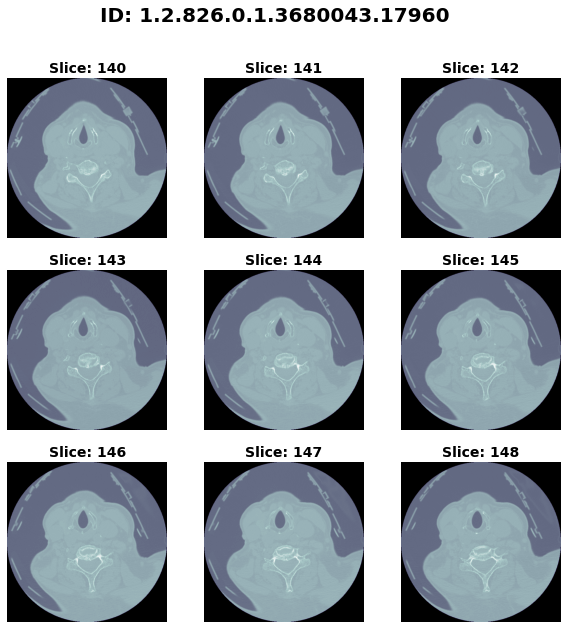

In [16]:
# from https://www.kaggle.com/code/samuelcortinhas/rsna-fracture-detection-in-depth-eda

start_slice = 140

path = "../input/rsna-2022-cervical-spine-fracture-detection/train_iamges/1.2.826.0.1.3680043.17960/"


# Plot images
fig, loc = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
fig.suptitle(f'ID: 1.2.826.0.1.3680043.17960', weight="bold", size=20)

for i in range(start_slice,start_slice+9):
    dcm_path = "../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17960/{}.dcm".format(i)
    example_dcm = pydicom.dcmread(dcm_path)
    
    # Calculate coordinates for the image on the grid
    x = (i-start_slice) // 3
    y = (i-start_slice) % 3

    loc[x, y].imshow(example_dcm.pixel_array, cmap='bone')
    loc[x, y].set_title(f"Slice: {i}", fontsize=14, weight='bold')
    loc[x, y].axis('off')

The output above shows what the images look like. However, they do not containt any information on the location within the spine and therefore, there is no information about which vertebrae is visible in the slice.

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>4.2 Neuroimaging Informatics Technology Initiative(NIfTI)</b></p>
</div>

"The main difference between DICOM and NIfTI is that the raw image data in NIfTI is saved as a 3d image, where in DICOM you have 2d image slices. This makes NIFTI more preferable for some machine learning applications over DICOM, because it is modeled as a 3d image." [(Taposh Roy - kdnuggets.com)](https://www.kdnuggets.com/2017/07/medical-image-analysis-deep-learning-part-4.html)

For this challenge we are provided with 87 files (in the folder segmentations) that correspond to one patient each. We can read the .nii files with the [nibabel library](https://nipy.org/nibabel/gettingstarted.html) and can see, that the shape is (height, width, num_images). The number of images corresponds to the number of DICOM images that are provided for the same patient.


In [17]:
example_path_nii = f"../input/rsna-2022-cervical-spine-fracture-detection/segmentations/1.2.826.0.1.3680043.17960.nii"
nii_example = nib.load(example_path_nii)
data = nii_example.get_fdata()
data.shape

(512, 512, 271)


"Please be aware that the NIFTI files consist of segmentation in the sagittal plane, while the DICOM files are in the axial plane. Please use the NIFTI header information to determine the appropriate orientation such that the DICOM images and segmentation match. Otherwise, you run the risk of having the segmentations flipped in the Z axis and mirrored in the X axis." [(Harshit Sheoran)](https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/discussion/340612)

To achieve that we can do as follows (also provided by [(Harshit Sheoran)](https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/discussion/340612)):



In [18]:
data_transposed = data[:, ::-1, ::-1].transpose(2, 1, 0)
data_transposed.shape

(271, 512, 512)

After the operation, the shape is now (num_images, height, width).

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>4.3 Masks</b></p>
</div>

Below are the same slices from the same patient as in 4.1 (You can see a side by side comparison in chapter 4.5.). These masks help us identify the location of the vertebrae within the image an can help us determine which vertebra is in the image. 

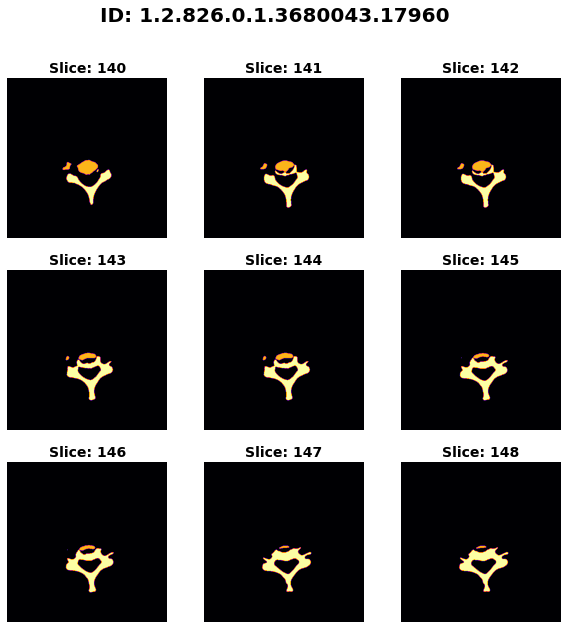

In [19]:
start_slice = 140

# Plot images
fig, loc = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
fig.suptitle(f'ID: 1.2.826.0.1.3680043.17960', weight="bold", size=20)

for i in range(start_slice,start_slice+9):
    # Calculate coordinates for the image on the grid
    x = (i-start_slice) // 3
    y = (i-start_slice) % 3

    loc[x, y].imshow(data_transposed[i], cmap='inferno')
    loc[x, y].set_title(f"Slice: {i}", fontsize=14, weight='bold')
    loc[x, y].axis('off')

<hr>

We have a total of 87 segmentation files (4.31% of the total) but 2019 patients. The implications of that are explained in 4.4 Determining location.

In [20]:
_, _, files = next(os.walk("../input/rsna-2022-cervical-spine-fracture-detection/segmentations/"))
file_count = len(files)
train_data_len = len(train_data)
percentage = np.round(file_count/train_data_len*100,2)

print(f"Segmentation files: {file_count}")
print(f"Training examples: {train_data_len}")
print(f"({percentage}%)")

Segmentation files: 87
Training examples: 2019
(4.31%)


<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>4.4 Determining location</b></p>
</div>

For the submission we not only need to provide whether a patient has a fracture, but also in which vertebrae. Therefore, we must be able to attribute each slice to the corresponding vertebra.

With the help of the .nii files we can easily determine the location of the the slice. Which means we can determine which vertebra is visible in any given DICOM image. This can be done by evaluating the unique values in the data that we created in 4.2. (provided by [Harshit Sheoran](https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/discussion/340612))



In [21]:
segmentations = nib.load(f"../input/rsna-2022-cervical-spine-fracture-detection/segmentations/1.2.826.0.1.3680043.10921.nii").get_fdata()[:, ::-1, ::-1].transpose(2, 1, 0)
np.unique(segmentations[199]) # slice 199 corresponds to DICOM Image 200.dcm

array([0., 6.])

The second value of the array from the output shows which vertebra is in the slice. In this case C6.

Unfortunately, since we only have 87 segmentation files, this doens't scale to the whole training data and we need another solution to determine the location of all other patients. 

[Samuel Cortinhas](https://www.kaggle.com/samuelcortinhas) offers an interesting approach to this issue in this notebook:
https://www.kaggle.com/code/samuelcortinhas/extracting-vertebrae-c1-c7/notebook


<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>4.5 Comparision</b></p>
</div>

The comparison of the .dcm file (Train image) with the .nii file (Segmentation Mask) for the same slice of the same patient shows nicely, how usefull the segmentation data is and how easy it is to isolate the vertebra with it.

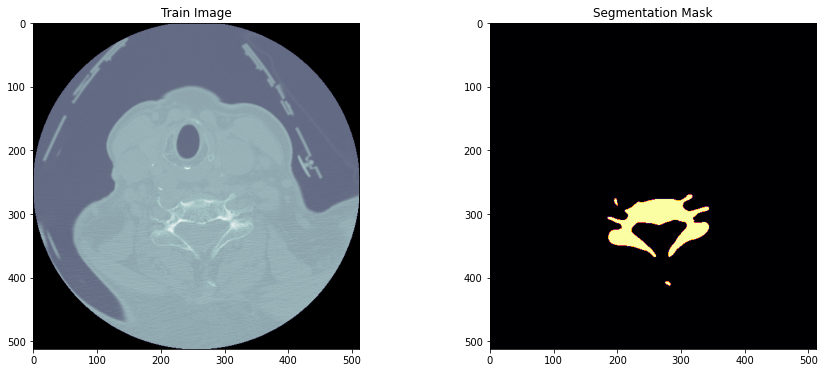

In [22]:
ds = pydicom.dcmread('../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17960/151.dcm')
mask = data_transposed[150]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(ds.pixel_array, cmap="bone")
plt.title('Train Image')
plt.subplot(1,2,2)
plt.imshow(mask, cmap='inferno')
plt.title('Segmentation Mask')
plt.show()


# 5. Example of fractures
<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>5.1 Bounding Boxes</b></p>
</div>

Bounding boxes are only provided for patients with fractures, but unfortunately not all of them. Out of 961 patients with fractures, only **235 (24.45%)** are provided with bounding boxes. The total number of bounding boxes is 7217 and there already clear, that one patient has multiple bounding boxes. These bounding boxes show us exactly where the fracture is located and therefore, it would be usefull to have this information for all images with fracture. One consideration is to enhance the training data by first training an **object localization model** in order to provide bounding boxes for the rest of the patients.

In [23]:
bbox_len = len(train_bbox)
patients_with_fracture = train_data["patient_overall"].sum()
patients_with_bbox = train_bbox["StudyInstanceUID"].unique().size

percentage = np.round(patients_with_bbox/patients_with_fracture*100,2)

print(f"Number of bouding boxes: {bbox_len}")
print(f"Number of Patients: {len(train_data)}")
print(f"Patients with fracture: {patients_with_fracture}")
print(f"Patients with bounding boxes: {patients_with_bbox}")
print(f"({percentage}%)")

Number of bouding boxes: 7217
Number of Patients: 2019
Patients with fracture: 961
Patients with bounding boxes: 235
(24.45%)


<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>5.2 Example images</b></p>
</div>

Below are examples of bounding boxes on different patients. The code comes from [Samuel Cortinhas](https://www.kaggle.com/code/samuelcortinhas/rsna-fracture-detection-in-depth-eda).

**Important:** make sure that you have all the necessary imports in order to correctly display the images (see 1.5 libraries).

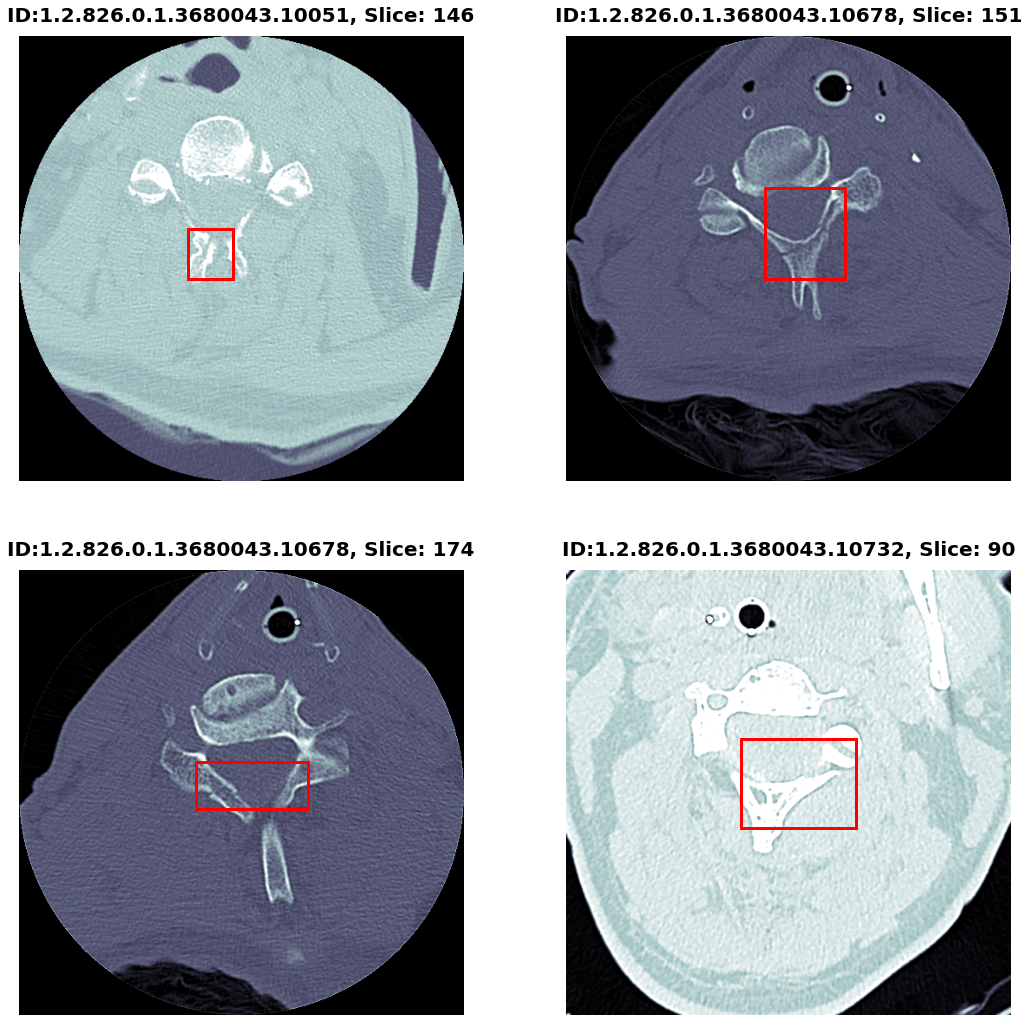

In [24]:
base_path = "../input/rsna-2022-cervical-spine-fracture-detection"

def plot_fracture(slice_num,bbox_id,ax_id1,ax_id2):
    file = pydicom.dcmread(f"{base_path}/train_images/{bbox_id}/{slice_num}.dcm")
    img = apply_voi_lut(file.pixel_array, file)
    info = train_bbox[(train_bbox['StudyInstanceUID']==bbox_id)&(train_bbox['slice_number']==slice_num)]
    rect = patches.Rectangle((float(info.x), float(info.y)), float(info.width), float(info.height), linewidth=3, edgecolor='r', facecolor='none')

    axes[ax_id1,ax_id2].imshow(img, cmap="bone")
    axes[ax_id1,ax_id2].add_patch(rect)
    axes[ax_id1,ax_id2].set_title(f"ID:{bbox_id}, Slice: {slice_num}", fontsize=20, weight='bold',y=1.02)
    axes[ax_id1,ax_id2].axis('off')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,18))
plot_fracture(146,'1.2.826.0.1.3680043.10051',0,0)
plot_fracture(151,'1.2.826.0.1.3680043.10678',0,1)
plot_fracture(174,'1.2.826.0.1.3680043.10678',1,0)
plot_fracture(90,'1.2.826.0.1.3680043.10732',1,1)

# 7. References/Acknowledgements

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>7.1 Acknowledgements</b></p>
</div>

A very special thanks to [Samuel Cortinhas](https://www.kaggle.com/samuelcortinhas) for the inspiration to create this notebook. Many ideas and also code (always referenced) come from his amazing indepth EDA (https://www.kaggle.com/code/samuelcortinhas/rsna-fracture-detection-in-depth-eda) and helped me to understand the challenge as well as all the provided data much better. 

Thank you to everyone that provided amazing inputs for this notebook. Everyone's code used should be referenced in this notebook at the appropriate position. If you notice any references missing, please do not hesitate to comment and I will gladly add them. :)

<div style="color:white;display:fill;
            background-color:#48AFFF;font-size:160%;
            font-family:Arial">
    <p style="padding: 4px;color:white;"><b>7.2 References</b></p>
</div>

* [🦴 RSNA Fracture Detection - in-depth EDA](https://www.kaggle.com/code/samuelcortinhas/rsna-fracture-detection-in-depth-eda) by [Samuel Cortinhas](https://www.kaggle.com/samuelcortinhas).
* [EDA🔎 | RSNA 2022 Fracture Detection](https://www.kaggle.com/code/pathikghugare/eda-rsna-2022-fracture-detection) by [Pathik Ghugare](https://www.kaggle.com/pathikghugare).
* [Explaining Data and Submission in detail](https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/discussion/340612) by [Harshit Sheoran](https://www.kaggle.com/harshitsheoran)
* [Pydicom Utility](https://www.kaggle.com/datasets/ipythonx/for-pydicom) by [M.Innat](https://www.kaggle.com/ipythonx/datasets)